In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

In [4]:
data = pd.read_csv('04_22.csv')

In [5]:
data

,Unnamed: 0,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,FTR
0,30,1.199006,-0.325458,1.672309,0.092964,0.072379,0.371667,0.741030,3.063633,-0.719519,-0.001163,-0.030735,-3.109829,1.543916,3.950040,-0.934438,H
1,31,0.459169,0.850221,-1.134070,0.545853,0.878015,-1.007148,-2.061876,0.253267,-0.719519,1.293817,-0.674108,2.663004,-0.768541,0.295855,-0.934438,H
2,32,-2.130261,-1.501137,-0.733159,-1.175124,-2.183401,-0.087938,-0.248231,-1.932574,1.150657,-1.296144,1.256011,-0.030984,0.773097,-2.546289,1.511995,H
3,33,1.199006,1.634007,0.068664,-0.178769,-0.411002,0.831272,0.741030,-0.058996,-1.966302,1.941308,-1.317481,2.278149,1.543916,-0.110165,-2.565393,H
4,34,-1.760342,-1.893029,-0.332247,-0.903391,-2.022274,-2.477883,-2.721384,-1.308048,3.020833,-0.001163,5.116251,0.738727,0.002278,-1.734247,3.958427,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6835,-0.650587,0.066435,0.068664,0.002387,-0.088748,0.463588,0.081522,-0.278424,0.341932,-0.018663,0.369200,-0.239014,0.418937,-0.568679,1.572887,H
6296,6836,1.568924,2.025900,1.271398,-0.631657,0.394634,0.923193,-0.248231,-0.075875,-0.567883,0.453830,-0.413281,0.509894,0.856429,0.195355,-0.400564,H
6297,6837,1.938843,0.850221,1.672309,1.632786,0.716888,1.382798,0.246399,1.949614,-0.011885,2.186304,-0.674108,-1.549604,-0.581044,1.332010,-0.472847,H
6298,6838,0.829087,2.025900,-0.332247,1.179897,0.072379,1.290877,0.741030,2.000251,-0.315156,2.448800,0.004042,-1.612013,0.106443,1.317743,-0.457190,H


In [6]:
def runKFold(l, m, n):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC', 'pastASTC-HSTC', 
              'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    param_init = {
    "objective": 'multi:softmax',
    "reg_alpha" : 0,
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    kfold = StratifiedKFold(n_splits=17)
    X = x[0:5950]
    Y = y[0:5950]
    results = cross_val_score(xgb_model, X, Y, cv=kfold)
    acc = results.mean()
    return acc

In [7]:
runKFold(6, 25, 0.1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:23] WARNING: 

0.5300840336134454

In [12]:
def runXGB(i, j, k, l, m, n):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    y
    c = (i-2004)*350
    t = (j-4)*10
    q = k*10
    x_train = x[0:c]
    y_train = y[0:c]
    x_test = x[c+t:c+q]
    y_test = y[c+t:c+q]
    param_init = {
    "objective": 'multi:softmax',
    "penalty": 'L2',
    "reg_alpha" : 1,
    "reg_lambda" : 1,
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    eval_set = [(x_train, y_train), (x_test, y_test)]
    clf_XGB = xgb_model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, early_stopping_rounds=10, verbose=True)
    predictions = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results = xgb_model.evals_result()
    logloss = results['validation_1']['mlogloss'][-1]
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    title1 = 'XGBoost Log Loss' + '-' + 'Max_depth' + ':' + str(l) + 'N_estimator' + ':' + str(m)
    pyplot.ylabel('Log Loss')
    pyplot.title(title1)
    pyplot.show()
    # plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    title2 = 'XGBoost Classfication Ẻrror' + '-' + 'Max_depth' + ':' + str(l) + 'N_estimator' + ':' + str(m)
    pyplot.ylabel('Classification Error')
    pyplot.title(title2)
    pyplot.show()
    return accuracy, logloss
    

[15:31:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "penalty", "silent" } are not used.

[0]	validation_0-merror:0.38319	validation_0-mlogloss:1.06755	validation_1-merror:0.50286	validation_1-mlogloss:1.08128


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-merror:0.36454	validation_0-mlogloss:1.03988	validation_1-merror:0.48571	validation_1-mlogloss:1.06564
[2]	validation_0-merror:0.34706	validation_0-mlogloss:1.01443	validation_1-merror:0.46571	validation_1-mlogloss:1.05263
[3]	validation_0-merror:0.33412	validation_0-mlogloss:0.98969	validation_1-merror:0.45429	validation_1-mlogloss:1.04066
[4]	validation_0-merror:0.33798	validation_0-mlogloss:0.97082	validation_1-merror:0.46000	validation_1-mlogloss:1.03174
[5]	validation_0-merror:0.33160	validation_0-mlogloss:0.95138	validation_1-merror:0.46286	validation_1-mlogloss:1.02389
[6]	validation_0-merror:0.33126	validation_0-mlogloss:0.93323	validation_1-merror:0.46571	validation_1-mlogloss:1.01671
[7]	validation_0-merror:0.32353	validation_0-mlogloss:0.91553	validation_1-merror:0.46857	validation_1-mlogloss:1.01199
[8]	validation_0-merror:0.31899	validation_0-mlogloss:0.90037	validation_1-merror:0.45429	validation_1-mlogloss:1.00619
[9]	validation_0-merror:0.31782	validati

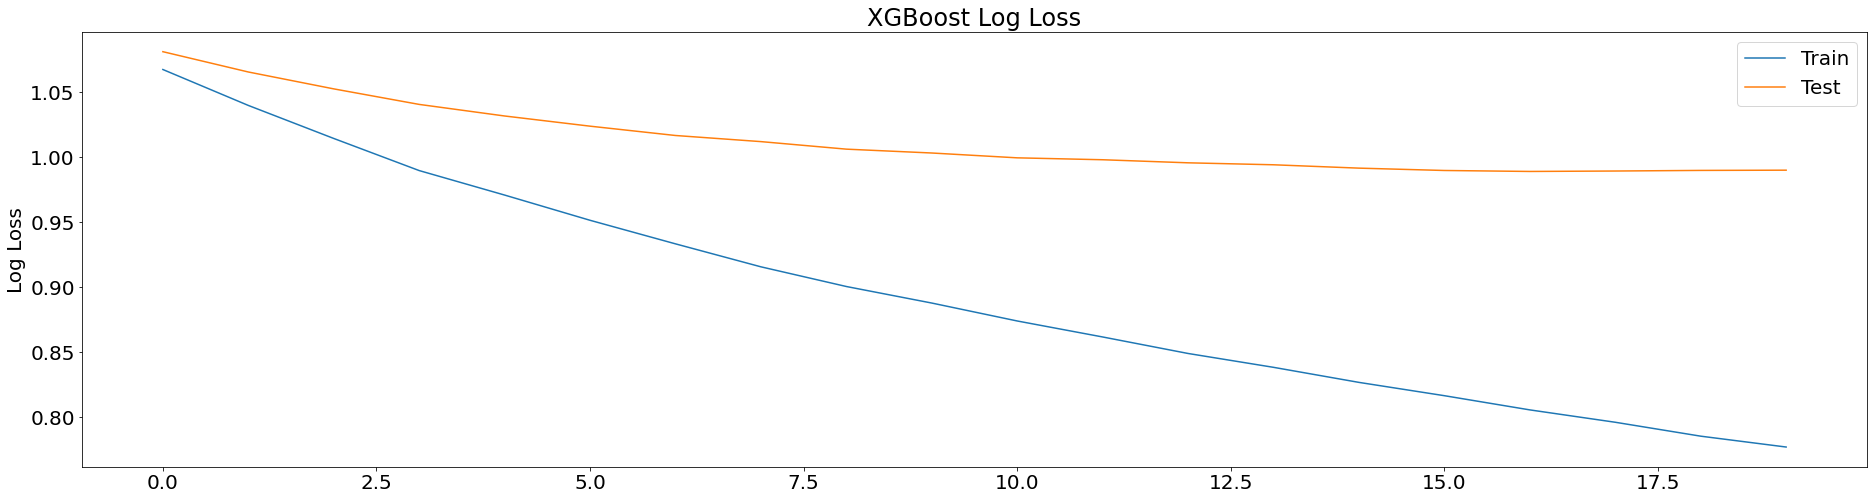

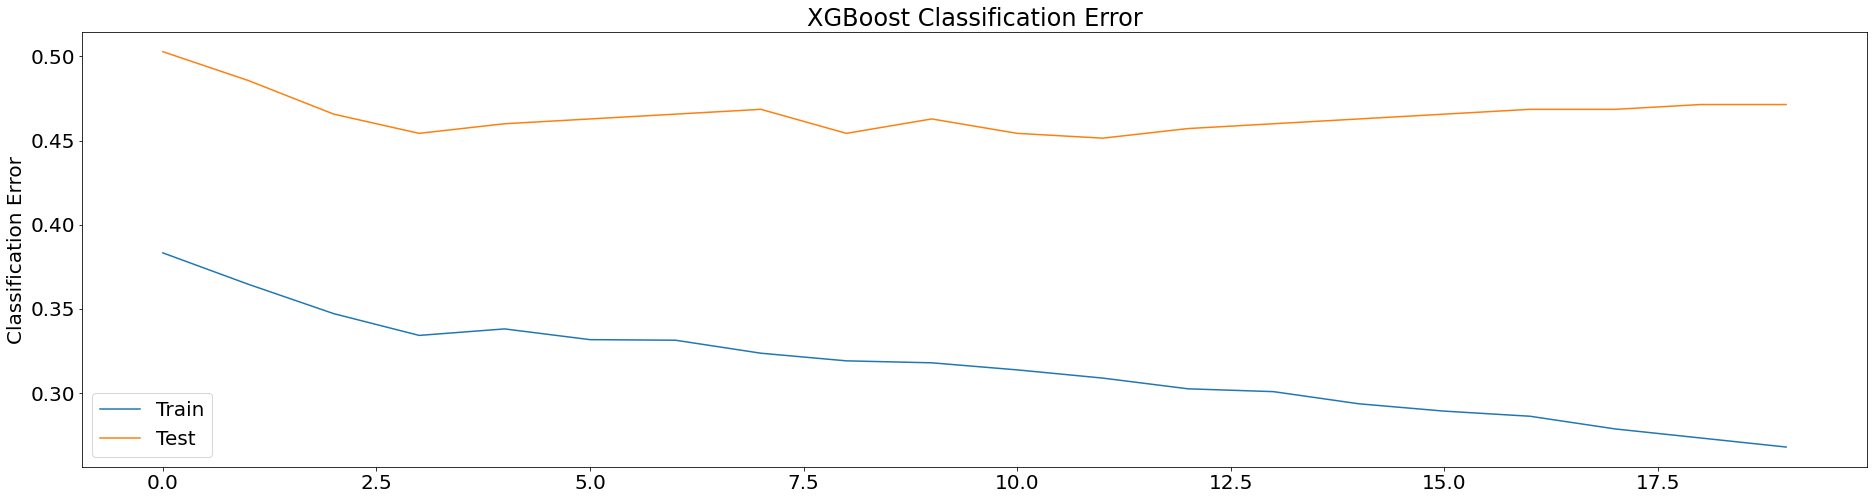

(0.5314285714285715, 0.989986564218998)

In [16]:
runXGB(2021, 4, 38, 8, 20, 0.1)

In [10]:
def CrossValPLT(a, b, c, d, i, j, k, l):
    val_50_1_1 = runKFold(a, i, 0.1)
    val_50_1_2 = runKFold(a, j, 0.1)
    val_50_1_3 = runKFold(a, k, 0.1)
    val_50_1_4 = runKFold(a, l, 0.1)
    val_50_2_1 = runKFold(b, i, 0.1)
    val_50_2_2 = runKFold(b, j, 0.1)
    val_50_2_3 = runKFold(b, k, 0.1)
    val_50_2_4 = runKFold(b, l, 0.1)
    val_50_3_1 = runKFold(c, i, 0.1)
    val_50_3_2 = runKFold(c, j, 0.1)
    val_50_3_3 = runKFold(c, k, 0.1)
    val_50_3_4 = runKFold(c, l, 0.1)
    val_50_4_1 = runKFold(d, i, 0.1)
    val_50_4_2 = runKFold(d, j, 0.1)
    val_50_4_3 = runKFold(d, k, 0.1)
    val_50_4_4 = runKFold(d, l, 0.1)
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    x4 = 'max_depth=' + str(d)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)
    y4 = 'n_estimator=' + str(l)
    objects = (x1, x2, x3, x4)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [32, 8]
    plt.rcParams['font.size'] = '20'
    xgb1 = [val_50_1_1, val_50_2_1, val_50_3_1, val_50_4_1]
    xgb2 = [val_50_1_2, val_50_2_2, val_50_3_2, val_50_4_2]
    xgb3 = [val_50_1_3, val_50_2_3, val_50_3_3, val_50_4_3]
    xgb4 = [val_50_1_4, val_50_2_4, val_50_3_4, val_50_4_4]
    for index, value in enumerate(xgb1):
        plt.text(index - 0.44, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.2, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.04, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb4):
        plt.text(index + 0.28, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    bars_sigmoid = plt.bar(y_pos - 0.36, xgb1, 0.24, label = y1, color = 'red')
    plt.bar(y_pos - 0.12, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.12, xgb3, 0.24, label = y3, color = 'yellow')
    bars_xyz = plt.bar(y_pos + 0.36, xgb4, 0.24, label = y4, color = 'brown')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.1])
    plt.ylabel("Tuning hyparameters")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    patterns = ("x", "x", "x", "x")
    for i, x in zip(bars_xyz,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)


[15:27:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:35] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:39] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:44] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:50] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:55] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:27:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:27:58] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:02] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:06] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:11] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:15] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:21] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:28] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:35] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:47] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:28:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:28:57] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:29:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:29:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:29:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:29:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:29:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[15:29:05] WARNING: 

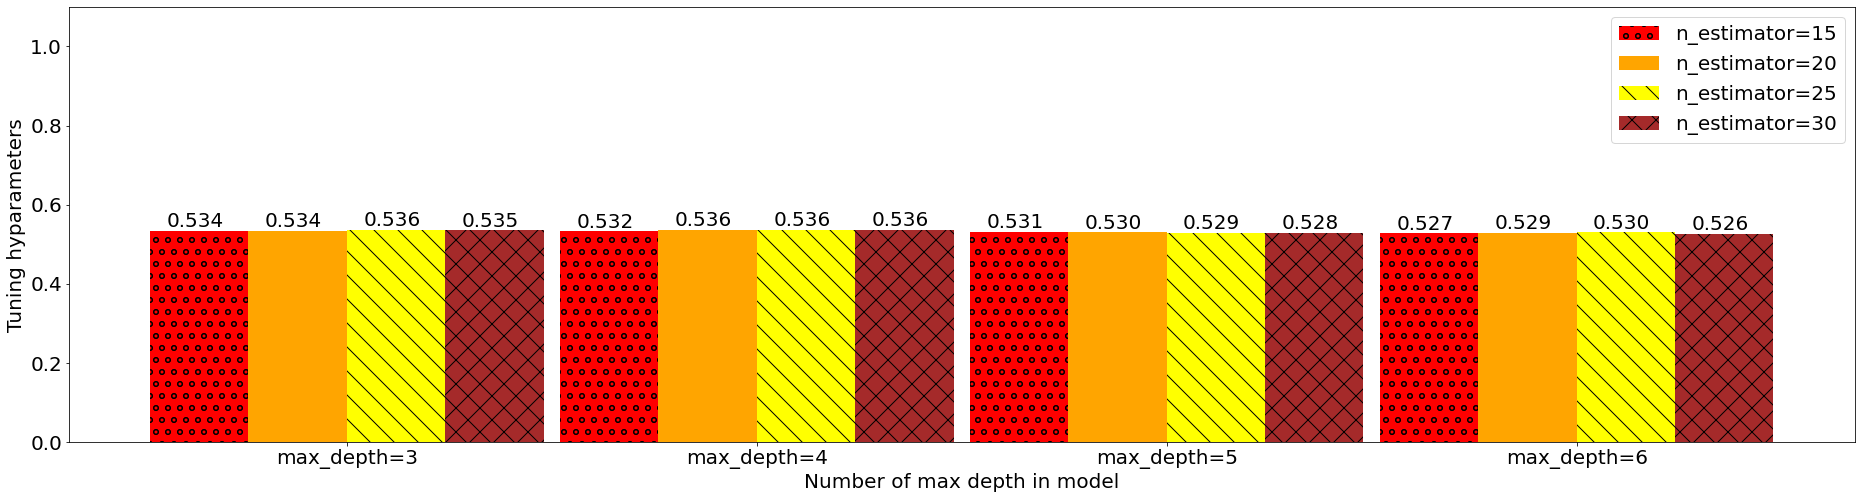

In [11]:
CrossValPLT(3, 4, 5, 6, 15, 20, 25, 30)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:53:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:53:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:53:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:53:56] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:03] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:10] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:16] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:24] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:31] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:40] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:48] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:54:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:54:58] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:55:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:08] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:55:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:15] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:55:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:25] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:55:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:40] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:55:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:55:53] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:56:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:11] WARNING: 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:56:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:56:26] WARNING: 

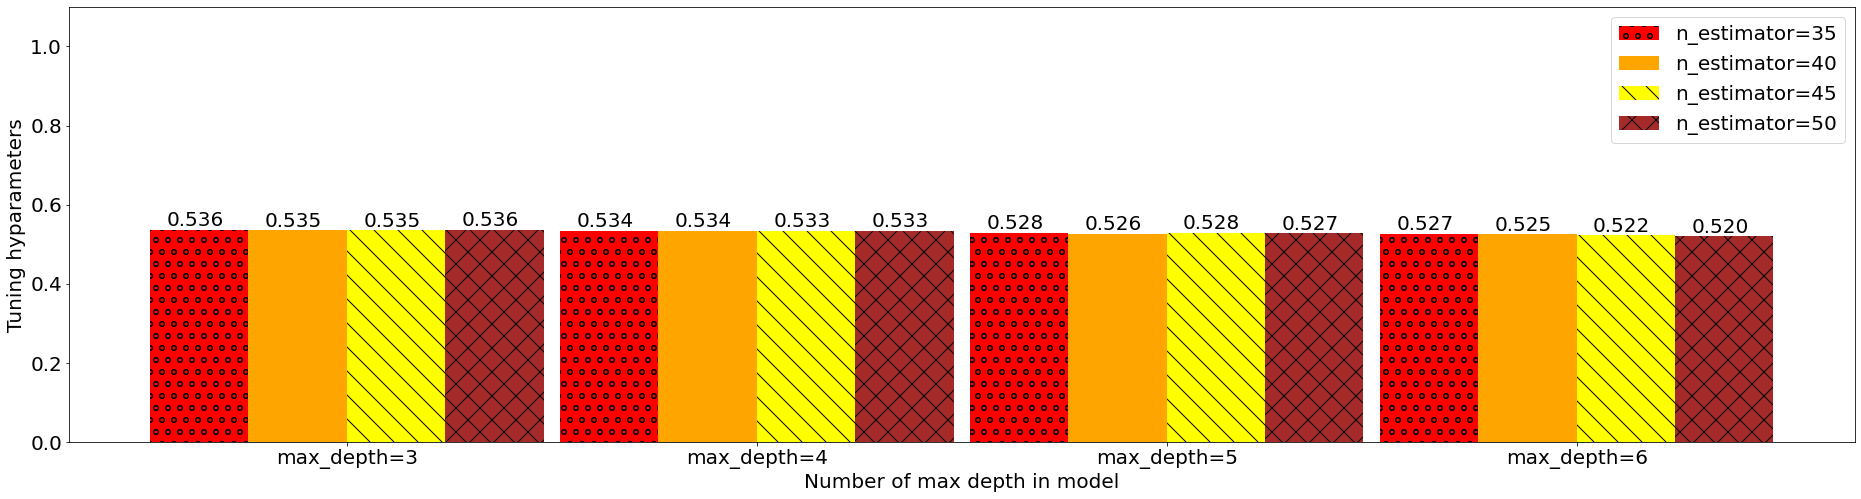

In [12]:
CrossValPLT(3, 4, 5, 6, 35, 40, 45, 50)

In [13]:
def AccPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[0]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[0]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[0]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[0]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[0]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[0]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[0]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[0]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[0]
    
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)

    objects = (x1, x2, x3)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb1):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb1, 0.24, label = y1, color = 'magenta')
    plt.bar(y_pos, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb3, 0.24, label = y3, color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Accuracy of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


[08:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-merror:0.45294	validation_0-mlogloss:1.07811	validation_1-merror:0.49143	validation_1-mlogloss:1.08172
[1]	validation_0-merror:0.44874	validation_0-mlogloss:1.06028	validation_1-merror:0.49714	validation_1-mlogloss:1.06591
[2]	validation_0-merror:0.44773	validation_0-mlogloss:1.04515	validation_1-merror:0.49143	validation_1-mlogloss:1.05433
[3]	validation_0-merror:0.44689	validation_0-mlogloss:1.03147	validation_1-merror:0.49143	validation_1-mlogloss:1.04327
[4]	validation_0-merror:0.44454	validation_0-mlogloss:1.02016	validation_1-merror:0.49143	validation_1-mlogloss:1.03418
[5]	validation_0-merror:0.44437	validation_0-mlogloss:1.00996	validation_1-merror:0.47714	validation_1-mlogloss:1.02723


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.44521	validation_0-mlogloss:1.00069	validation_1-merror:0.47429	validation_1-mlogloss:1.02002
[7]	validation_0-merror:0.44504	validation_0-mlogloss:0.99241	validation_1-merror:0.48000	validation_1-mlogloss:1.01383
[8]	validation_0-merror:0.44622	validation_0-mlogloss:0.98493	validation_1-merror:0.48000	validation_1-mlogloss:1.00814
[9]	validation_0-merror:0.44622	validation_0-mlogloss:0.97874	validation_1-merror:0.47714	validation_1-mlogloss:1.00321
[10]	validation_0-merror:0.44504	validation_0-mlogloss:0.97291	validation_1-merror:0.48000	validation_1-mlogloss:0.99872
[11]	validation_0-merror:0.44588	validation_0-mlogloss:0.96799	validation_1-merror:0.48000	validation_1-mlogloss:0.99461
[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	validation_0-mlogloss:0.95535	validation_1-merror:0.47143	validation_1-mlogloss:0.98898
[15]	validation_0-merror:0.44286	validation_0-mlogloss:0.95177	validation_1-merror:0.46857	validation_1-mlogloss:0.98790
[16]	validation_0-merror:0.44370	validation_0-mlogloss:0.94828	validation_1-merror:0.47429	validation_1-mlogloss:0.98688
[17]	validation_0-merror:0.44235	validation_0-mlogloss:0.94549	validation_1-merror:0.47429	validation_1-mlogloss:0.98707
[18]	validation_0-merror:0.44168	validation_0-mlogloss:0.94232	validation_1-merror:0.47429	validation_1-mlogloss:0.98751
[19]	validation_0-merror:0.44202	validation_0-mlogloss:0.93961	validation_1-merror:0.46857	validation_1-mlogloss:0.98630
[08:56:40] WARNING: C:/buildkite

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-merror:0.44504	validation_0-mlogloss:0.97291	validation_1-merror:0.48000	validation_1-mlogloss:0.99872
[11]	validation_0-merror:0.44588	validation_0-mlogloss:0.96799	validation_1-merror:0.48000	validation_1-mlogloss:0.99461
[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	validation_0-mlogloss:0.95535	validation_1-merror:0.47143	validation_1-mlogloss:0.98898
[15]	validation_0-merror:0.44286	validation_0-mlogloss:0.95177	validation_1-merror:0.46857	validation_1-mlogloss:0.98790
[16]	validation_0-merror:0.44370	validation_0-mlogloss:0.94828	validation_1-merror:0.47429	validation_1-mlogloss:0.98688
[17]	validation_0-merror:0.44235	validation_0-mlogloss:0.94549	validation_1-merror:0.47429	validation_1-mlogloss:0.98707
[18]	validation_0-merror:0.44168

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.43059	validation_0-mlogloss:0.98697	validation_1-merror:0.47143	validation_1-mlogloss:1.01650
[7]	validation_0-merror:0.43244	validation_0-mlogloss:0.97710	validation_1-merror:0.48000	validation_1-mlogloss:1.01059
[8]	validation_0-merror:0.43076	validation_0-mlogloss:0.96830	validation_1-merror:0.46857	validation_1-mlogloss:1.00447
[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-merror:0.43076	validation_0-mlogloss:0.96830	validation_1-merror:0.46857	validation_1-mlogloss:1.00447
[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	validation_0-mlogloss:0.93036	validation_1-merror:0.46857	validation_1-mlogloss:0.98612
[15]	validation_0-merror:0.42588	validation_0-mlogloss:0.92585	validation_1-merror:0.46857	validation_1-mlogloss:0.98552
[16]	validation_0-merror:0.42420	v

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-merror:0.43244	validation_0-mlogloss:0.97710	validation_1-merror:0.48000	validation_1-mlogloss:1.01059
[8]	validation_0-merror:0.43076	validation_0-mlogloss:0.96830	validation_1-merror:0.46857	validation_1-mlogloss:1.00447
[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	validation_0-mlogloss:0.93036	validation_1-merror:0.46857	validation_1-mlogloss:0.98612
[15]	validation_0-merror:0.42588	va

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	validation_0-mlogloss:0.90235	validation_1-merror:0.46571	validation_1-mlogloss:0.98908
[14]	validation_0-merror:0.38706	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-merror:0.40622	validation_0-mlogloss:0.98180	validation_1-merror:0.47429	validation_1-mlogloss:1.02278
[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	vali

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	validation_0-mlogloss:0.90235	validation_1-merror:0.46571	validation_1-mlogloss:0.98908
[14]	validation_0-merror:0.38706	val

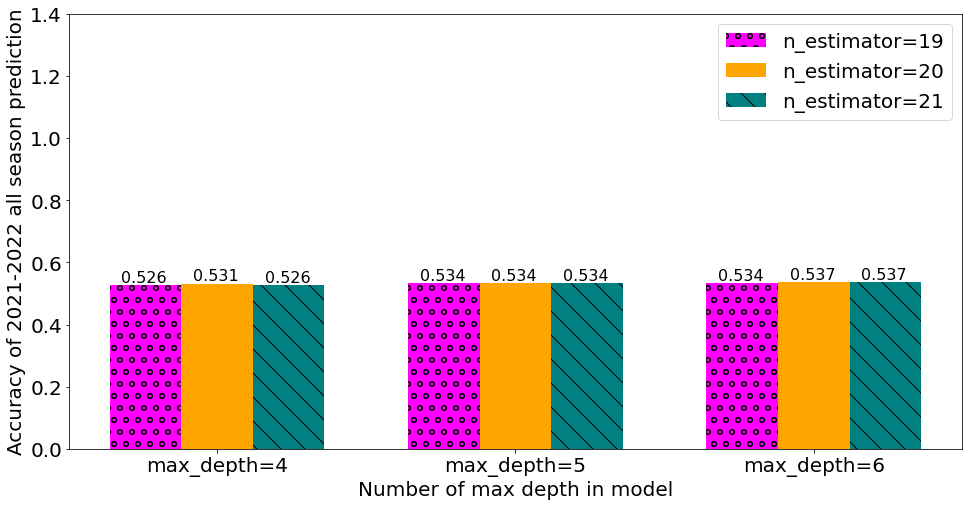

In [14]:
AccPLT(4, 5, 6, 19, 20, 21)

In [15]:
def LoglossPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[1]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[1]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[1]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[1]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[1]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[1]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[1]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[1]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[1]
    
    x1 = 'max_depth=' + str(a)
    x2 = 'max_depth=' + str(b)
    x3 = 'max_depth=' + str(c)
    y1 = 'n_estimator=' + str(i)
    y2 = 'n_estimator=' + str(j)
    y3 = 'n_estimator=' + str(k)


    objects = (x1, x2, x3)
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb1):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb2):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb3):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb1, 0.24, label = y1, color = 'magenta')
    plt.bar(y_pos, xgb2, 0.24, label = y2, color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb3, 0.24, label = y3, color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Logloss of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


[08:56:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-merror:0.45294	validation_0-mlogloss:1.07811	validation_1-merror:0.49143	validation_1-mlogloss:1.08172
[1]	validation_0-merror:0.44874	validation_0-mlogloss:1.06028	validation_1-merror:0.49714	validation_1-mlogloss:1.06591
[2]	validation_0-merror:0.44773	validation_0-mlogloss:1.04515	validation_1-merror:0.49143	validation_1-mlogloss:1.05433
[3]	validation_0-merror:0.44689	validation_0-mlogloss:1.03147	validation_1-merror:0.49143	validation_1-mlogloss:1.04327
[4]	validation_0-merror:0.44454	validation_0-mlogloss:1.02016	validation_1-merror:0.49143	validation_1-mlogloss:1.03418
[5]	validation_0-merror:0.44437	validation_0-mlogloss:1.00996	validation_1-merror:0.47714	validation_1-mlogloss:1.02723
[6]	validation_0-merror:0.44521	validation_0-mlogloss:1.00069	validation_1-merror:0.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-merror:0.44504	validation_0-mlogloss:0.99241	validation_1-merror:0.48000	validation_1-mlogloss:1.01383
[8]	validation_0-merror:0.44622	validation_0-mlogloss:0.98493	validation_1-merror:0.48000	validation_1-mlogloss:1.00814
[9]	validation_0-merror:0.44622	validation_0-mlogloss:0.97874	validation_1-merror:0.47714	validation_1-mlogloss:1.00321
[10]	validation_0-merror:0.44504	validation_0-mlogloss:0.97291	validation_1-merror:0.48000	validation_1-mlogloss:0.99872
[11]	validation_0-merror:0.44588	validation_0-mlogloss:0.96799	validation_1-merror:0.48000	validation_1-mlogloss:0.99461
[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	validation_0-mlogloss:0.95535	validation_1-merror:0.47143	validation_1-mlogloss:0.98898
[15]	validation_0-merror:0.44286	va

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-merror:0.44622	validation_0-mlogloss:0.97874	validation_1-merror:0.47714	validation_1-mlogloss:1.00321
[10]	validation_0-merror:0.44504	validation_0-mlogloss:0.97291	validation_1-merror:0.48000	validation_1-mlogloss:0.99872
[11]	validation_0-merror:0.44588	validation_0-mlogloss:0.96799	validation_1-merror:0.48000	validation_1-mlogloss:0.99461
[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	validation_0-mlogloss:0.95535	validation_1-merror:0.47143	validation_1-mlogloss:0.98898
[15]	validation_0-merror:0.44286	validation_0-mlogloss:0.95177	validation_1-merror:0.46857	validation_1-mlogloss:0.98790
[16]	validation_0-merror:0.44370	validation_0-mlogloss:0.94828	validation_1-merror:0.47429	validation_1-mlogloss:0.98688
[17]	validation_0-merror:0.44235	

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-merror:0.44504	validation_0-mlogloss:0.97291	validation_1-merror:0.48000	validation_1-mlogloss:0.99872
[11]	validation_0-merror:0.44588	validation_0-mlogloss:0.96799	validation_1-merror:0.48000	validation_1-mlogloss:0.99461
[12]	validation_0-merror:0.44622	validation_0-mlogloss:0.96329	validation_1-merror:0.47714	validation_1-mlogloss:0.99208
[13]	validation_0-merror:0.44504	validation_0-mlogloss:0.95915	validation_1-merror:0.47714	validation_1-mlogloss:0.98998
[14]	validation_0-merror:0.44353	validation_0-mlogloss:0.95535	validation_1-merror:0.47143	validation_1-mlogloss:0.98898
[15]	validation_0-merror:0.44286	validation_0-mlogloss:0.95177	validation_1-merror:0.46857	validation_1-mlogloss:0.98790
[16]	validation_0-merror:0.44370	validation_0-mlogloss:0.94828	validation_1-merror:0.47429	validation_1-mlogloss:0.98688
[17]	validation_0-merror:0.44235	validation_0-mlogloss:0.94549	validation_1-merror:0.47429	validation_1-mlogloss:0.98707
[18]	validation_0-merror:0.44168

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	validation_0-mlogloss:0.93036	validation_1-merror:0.46857	validation_1-mlogloss:0.98612
[15]	validation_0-merror:0.42588	validation_0-mlogloss:0.92585	validation_1-merror:0.46857	validation_1-mlogloss:0.98552
[16]	validation_0-merror:0.42420	validation_0-mlogloss:0.92086	validation_1-merror:0.46571	validation_1-mlogloss:0.98540
[17]	validation_0-merror:0.42151	

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-merror:0.43076	validation_0-mlogloss:0.96830	validation_1-merror:0.46857	validation_1-mlogloss:1.00447
[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	validation_0-mlogloss:0.93036	validation_1-merror:0.46857	validation_1-mlogloss:0.98612
[15]	validation_0-merror:0.42588	validation_0-mlogloss:0.92585	validation_1-merror:0.46857	validation_1-mlogloss:0.98552
[16]	validation_0-merror:0.42420	v

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.43059	validation_0-mlogloss:0.98697	validation_1-merror:0.47143	validation_1-mlogloss:1.01650
[7]	validation_0-merror:0.43244	validation_0-mlogloss:0.97710	validation_1-merror:0.48000	validation_1-mlogloss:1.01059
[8]	validation_0-merror:0.43076	validation_0-mlogloss:0.96830	validation_1-merror:0.46857	validation_1-mlogloss:1.00447
[9]	validation_0-merror:0.42756	validation_0-mlogloss:0.96050	validation_1-merror:0.47714	validation_1-mlogloss:0.99909
[10]	validation_0-merror:0.42807	validation_0-mlogloss:0.95327	validation_1-merror:0.47429	validation_1-mlogloss:0.99454
[11]	validation_0-merror:0.42571	validation_0-mlogloss:0.94690	validation_1-merror:0.46857	validation_1-mlogloss:0.99041
[12]	validation_0-merror:0.42689	validation_0-mlogloss:0.94116	validation_1-merror:0.47143	validation_1-mlogloss:0.98863
[13]	validation_0-merror:0.42706	validation_0-mlogloss:0.93561	validation_1-merror:0.47143	validation_1-mlogloss:0.98716
[14]	validation_0-merror:0.42571	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	validation_0-mlogloss:0.90235	validation_1-merror:0.46571	validation_1-mlogloss:0.98908
[14]	validation_0-merror:0.38706	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	validation_0-mlogloss:0.90235	validation_1-merror:0.46571	validation_1-mlogloss:0.98908
[14]	validation_0-merror:0.38706	val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-merror:0.40706	validation_0-mlogloss:0.99592	validation_1-merror:0.47429	validation_1-mlogloss:1.03078
[5]	validation_0-merror:0.40622	validation_0-mlogloss:0.98180	validation_1-merror:0.47429	validation_1-mlogloss:1.02278
[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	valid

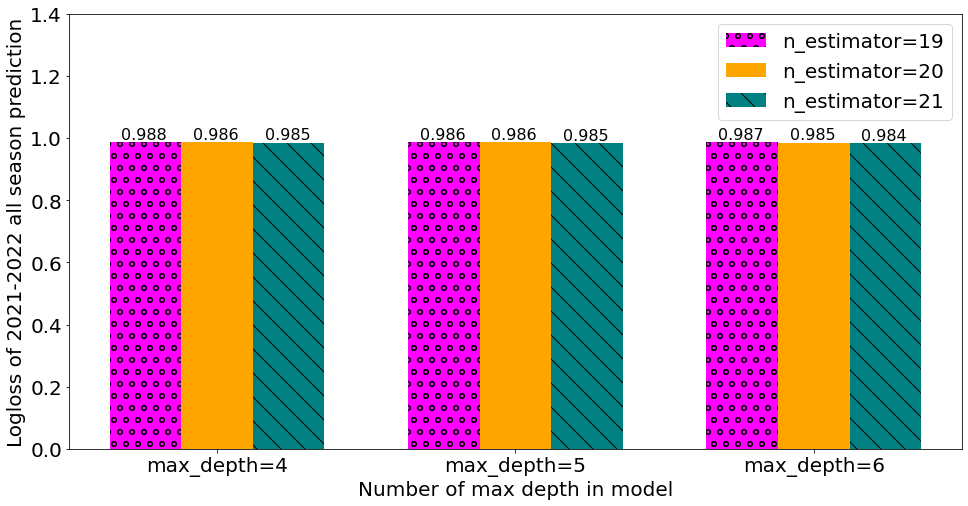

In [16]:
LoglossPLT(4, 5, 6, 19, 20, 21)